In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-review-dataset/flipkart_product.csv
/kaggle/input/lotuss/lotus.PNG


In [21]:
df = pd.read_csv("/kaggle/input/flipkart-product-review-dataset/flipkart_product.csv", encoding='latin1')

In [22]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [23]:
df.shape

(189874, 5)

In [24]:
df.dtypes

ProductName    object
Price          object
Rate           object
Review         object
Summary        object
dtype: object

In [25]:
df.dropna(inplace=True)

In [26]:
# Clean the `price` column
df['Price'] = df['Price'].str.replace(r'[^\d.,]', '', regex=True)  # Remove invalid characters

In [30]:
# Convert columns to appropriate data types
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce') 

In [31]:
df.dtypes

ProductName     object
Price          float64
Rate           float64
Review          object
Summary         object
dtype: object

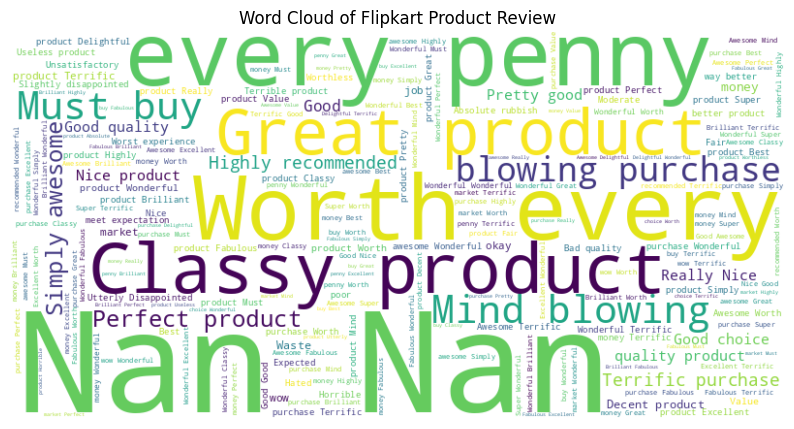

WordCloud saved as 'wordcloud_flipkart_reviews.png'


In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all reviews into a single string for the word cloud
text = ' '.join(df['Review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Save the WordCloud as an image file
wordcloud.to_file("wordcloud_flipkart_reviews.png")  # Save as a PNG file

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Flipkart Product Review')
plt.show()

print("WordCloud saved as 'wordcloud_flipkart_reviews.png'")